In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
# John Chamberlin's Hypothesis: "High CpG density may be useful for permitting either strong repression or activation of genes which are highly tissue- or context-specific"
# Test the hypothesis: "compare the variance in gene expression across tissues to the CpG density of their promoters"

# Data: 
#   gene expression level and variance: 
#     https://www.embopress.org/doi/full/10.15252/msb.20209539
#   CpG density: 
#     https://www.sciencedirect.com/science/article/pii/S0002929720302445?via%3Dihub
#     https://ars.els-cdn.com/content/image/1-s2.0-S0002929720302445-mmc1.pdf


In [3]:
import pandas as pd 

gene_expression_variation = pd.read_csv('/scratch/ucgd/lustre-work/quinlan/data-shared/constraint-tools/promoters/grch38/Sigalova2020/Dataset_EV10_all_variations.csv')
gene_expression_variation

,gene_name,gene_id,Adipose...Subcutaneous_mean,Adipose...Subcutaneous_median,Adipose...Subcutaneous_cv,Adipose...Subcutaneous_residual_cv,Adipose...Visceral..Omentum._mean,Adipose...Visceral..Omentum._median,Adipose...Visceral..Omentum._cv,Adipose...Visceral..Omentum._residual_cv,...,Thyroid_resid_cv,Uterus_resid_cv,Vagina_resid_cv,Whole.Blood_resid_cv,DE_Prior_Rank,GWAS_UPSTREAM_GENE_ID,GWAS_DOWNSTREAM_GENE_ID,CEGv2_subset,drug_targets_nelson,FDA_approved_drug_targets
0,DPM1,ENSG00000000419,7.346319,7.318724,-1.727679,-0.477543,7.363085,7.324162,-1.616095,-0.489283,...,-0.608713,-0.612328,-0.570814,0.069324,0.252086,NO,NO,NO,NO,NO
1,XDH,ENSG00000158125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.919049,NO,NO,NO,NO,YES
2,COA5,ENSG00000183513,7.266417,7.257528,-1.912434,-0.666104,7.083291,7.075745,-1.540021,-0.449251,...,-0.421263,-0.539233,-0.695383,-0.079946,0.395968,NO,NO,YES,NO,NO
3,ARHGDIB,ENSG00000111348,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.408878,0.326218,0.353276,NaN,0.910651,NO,NO,NO,NO,NO
4,NMNAT2,ENSG00000157064,6.828882,6.656019,-0.465854,0.686289,7.075040,6.831370,-0.266864,0.791546,...,1.136185,0.631039,0.432596,NaN,0.885693,YES,NO,NO,YES,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11307,AMER3,ENSG00000178171,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.121688,NO,NO,NO,NO,NO
11308,BROX,ENSG00000162819,7.609070,7.600106,-1.696329,-0.401392,7.440338,7.430043,-1.629705,-0.481036,...,-0.306763,-0.310984,0.020878,0.082738,0.600694,NO,NO,NO,NO,NO
11309,SPAG6,ENSG00000077327,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.627451,NO,NO,NO,NO,NO
11310,FAM120A,ENSG00000048828,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,-0.430287,0.649489,YES,NO,NO,NO,NO


In [4]:
for column_heading in gene_expression_variation.columns: 
    print(column_heading)

gene_name
gene_id
Adipose...Subcutaneous_mean
Adipose...Subcutaneous_median
Adipose...Subcutaneous_cv
Adipose...Subcutaneous_residual_cv
Adipose...Visceral..Omentum._mean
Adipose...Visceral..Omentum._median
Adipose...Visceral..Omentum._cv
Adipose...Visceral..Omentum._residual_cv
Adrenal.Gland_mean
Adrenal.Gland_median
Adrenal.Gland_cv
Adrenal.Gland_residual_cv
Artery...Aorta_mean
Artery...Aorta_median
Artery...Aorta_cv
Artery...Aorta_residual_cv
Artery...Coronary_mean
Artery...Coronary_median
Artery...Coronary_cv
Artery...Coronary_residual_cv
Artery...Tibial_mean
Artery...Tibial_median
Artery...Tibial_cv
Artery...Tibial_residual_cv
Brain...Anterior.cingulate.cortex..BA24._mean
Brain...Anterior.cingulate.cortex..BA24._median
Brain...Anterior.cingulate.cortex..BA24._cv
Brain...Anterior.cingulate.cortex..BA24._residual_cv
Brain...Caudate..basal.ganglia._mean
Brain...Caudate..basal.ganglia._median
Brain...Caudate..basal.ganglia._cv
Brain...Caudate..basal.ganglia._residual_cv
Brain...Cerebe

In [5]:
# see the column "mean_variation_global" is referenced in Measuring expression level and variation in human tissues" at https://www.embopress.org/doi/full/10.15252/msb.20209539
gene_expression_variation = gene_expression_variation[['gene_name', 'gene_id', 'mean_variation_global']]
gene_expression_variation

,gene_name,gene_id,mean_variation_global
0,DPM1,ENSG00000000419,-0.651344
1,XDH,ENSG00000158125,0.725784
2,COA5,ENSG00000183513,-0.696164
3,ARHGDIB,ENSG00000111348,0.347273
4,NMNAT2,ENSG00000157064,0.430554
...,...,...,...
11307,AMER3,ENSG00000178171,-0.079337
11308,BROX,ENSG00000162819,-0.445117
11309,SPAG6,ENSG00000077327,0.659075
11310,FAM120A,ENSG00000048828,-0.454470


In [6]:
def get_promoters_and_loeuf(number_neutral_bases):
    number_neutral_bases_lower, number_neutral_bases_upper = tuple(map(int, number_neutral_bases.split(',')))
    CONSTRAINT_TOOLS_DATA = '/scratch/ucgd/lustre-work/quinlan/data-shared/constraint-tools'
    promoters_filename = (
        f'{CONSTRAINT_TOOLS_DATA}/promoters/grch38/'
        f'promoters-with-zscores.{number_neutral_bases_lower}-{number_neutral_bases_upper}.bed'
    )
    df = pd.read_csv(promoters_filename, sep='\t')
    
    # filter NaN
    is_NaN = df.isnull()
    row_has_NaN = is_NaN.any(axis=1)
    df = df[row_has_NaN == False]
    
    return df

frames = [get_promoters_and_loeuf(number_neutral_bases) for number_neutral_bases in [
    "150,200",
    "200,250",
    "250,300", 
    "300,400",
    "400,500",
    "500,600",
    "600,750",
    "750,1000",
]]
promoters_and_loeuf = pd.concat(frames, ignore_index=True)

promoters_and_loeuf = promoters_and_loeuf[['gene_name', 'gene_id', 'cpg_density_region_grch38', 'loeuf', 'promoter_phastcons', 'N_bar_mean_neutral', 'K_bar_mean_neutral']]
promoters_and_loeuf

,gene_name,gene_id,cpg_density_region_grch38,loeuf,promoter_phastcons,N_bar_mean_neutral,K_bar_mean_neutral
0,HNRNPU,ENSG00000153187,0.965798,0.118,0.343500,1.900500,0.120430
1,H3F3A,ENSG00000163041,0.902507,1.157,0.364550,-1.330061,0.025603
2,BCAR3,ENSG00000137936,0.856014,0.396,0.121925,-2.064132,0.999113
3,CACYBP,ENSG00000116161,0.766252,0.378,0.040050,-0.004744,0.914405
4,ARID4B,ENSG00000054267,0.746902,0.189,0.276475,-1.400205,-1.059925
...,...,...,...,...,...,...,...
9253,C22orf31,ENSG00000100249,0.246248,1.467,0.255675,0.766787,0.192697
9254,CRYBB2,ENSG00000244752,0.240393,0.614,0.095175,0.132702,-0.521678
9255,SLC5A1,ENSG00000100170,0.177320,0.746,0.091225,-0.978971,-0.510705
9256,SEC14L3,ENSG00000100012,0.146733,1.639,0.099950,-0.232547,0.313165


In [7]:
promoters_loeuf_expressionVariation = pd.merge(
    promoters_and_loeuf,
    gene_expression_variation, 
    on='gene_id', 
    how='inner'
)
promoters_loeuf_expressionVariation

,gene_name_x,gene_id,cpg_density_region_grch38,loeuf,promoter_phastcons,N_bar_mean_neutral,K_bar_mean_neutral,gene_name_y,mean_variation_global
0,BCAR3,ENSG00000137936,0.856014,0.396,0.121925,-2.064132,0.999113,BCAR3,-0.100340
1,ARID4B,ENSG00000054267,0.746902,0.189,0.276475,-1.400205,-1.059925,ARID4B,-0.435681
2,RSBN1,ENSG00000081019,0.724217,0.435,0.290900,-0.816445,-0.293793,RSBN1,-0.577140
3,SUSD4,ENSG00000143502,0.705071,0.734,0.222000,-2.608241,0.316959,SUSD4,0.365554
4,MAGI3,ENSG00000081026,0.698284,0.387,0.315775,-2.727076,0.987644,MAGI3,-0.451945
...,...,...,...,...,...,...,...,...,...
5978,AC002472.13,ENSG00000187905,0.350211,1.650,0.112625,-1.195286,0.785858,LRRC74B,-0.156440
5979,LGALS1,ENSG00000100097,0.346850,1.667,0.116800,-0.314059,0.127069,LGALS1,0.654454
5980,NFAM1,ENSG00000235568,0.296590,1.215,0.064800,-0.276616,-0.311553,NFAM1,0.330920
5981,VPREB3,ENSG00000128218,0.283518,1.885,0.076225,0.356627,-0.324641,VPREB3,0.513549


In [8]:
promoters_loeuf_expressionVariation = promoters_loeuf_expressionVariation[promoters_loeuf_expressionVariation['gene_name_x'] == promoters_loeuf_expressionVariation['gene_name_y']]
promoters_loeuf_expressionVariation = promoters_loeuf_expressionVariation.drop(columns=['gene_name_x', 'gene_name_y'])
promoters_loeuf_expressionVariation

,gene_id,cpg_density_region_grch38,loeuf,promoter_phastcons,N_bar_mean_neutral,K_bar_mean_neutral,mean_variation_global
0,ENSG00000137936,0.856014,0.396,0.121925,-2.064132,0.999113,-0.100340
1,ENSG00000054267,0.746902,0.189,0.276475,-1.400205,-1.059925,-0.435681
2,ENSG00000081019,0.724217,0.435,0.290900,-0.816445,-0.293793,-0.577140
3,ENSG00000143502,0.705071,0.734,0.222000,-2.608241,0.316959,0.365554
4,ENSG00000081026,0.698284,0.387,0.315775,-2.727076,0.987644,-0.451945
...,...,...,...,...,...,...,...
5977,ENSG00000100354,0.352168,0.159,0.489275,-0.255897,0.492825,-0.316788
5979,ENSG00000100097,0.346850,1.667,0.116800,-0.314059,0.127069,0.654454
5980,ENSG00000235568,0.296590,1.215,0.064800,-0.276616,-0.311553,0.330920
5981,ENSG00000128218,0.283518,1.885,0.076225,0.356627,-0.324641,0.513549


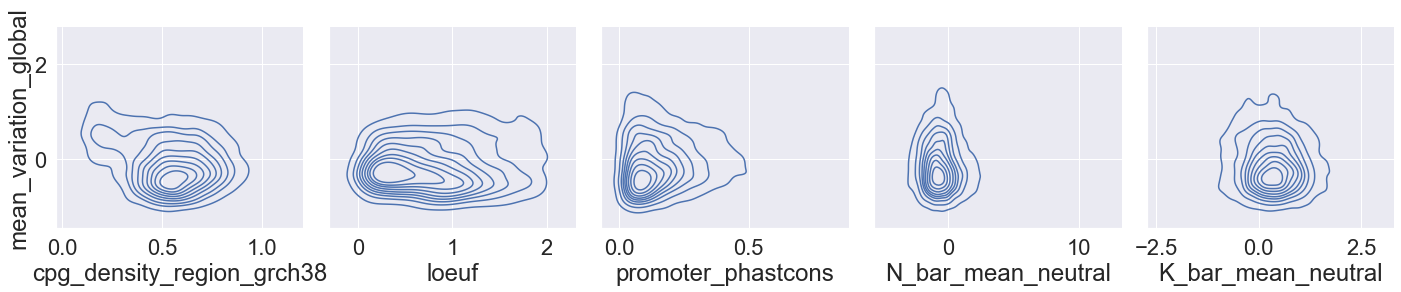

In [9]:
import seaborn as sns
sns.set(font_scale = 2)

x_vars = [
    'cpg_density_region_grch38', 
    'loeuf', 
    'promoter_phastcons', 
    'N_bar_mean_neutral', 
    'K_bar_mean_neutral'
]

sns.pairplot(
    data=promoters_loeuf_expressionVariation,
    x_vars=x_vars,
    y_vars=['mean_variation_global'],
    kind='kde',
    height=4
)